In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

random.seed(int('0xC0FFEE', 16))
np.random.seed(int('0xC0FFEE', 16))
PI = math.pi

## Numpy data load




In [3]:
### np.savez('./filename.npz', x=X, y=Y)

practice1_data = np.load('./practice1_data.npz')
print(f'Check key values: {practice1_data.files}')
X, Y = practice1_data['x'], practice1_data['y']
print(X.shape, Y.shape)
print(X[0:10], Y[0:10])

Check key values: ['x', 'y']
(1000,) (1000,)
[160.86429835 174.97366162 173.9137621  163.800405   190.03698413
 166.23929116 186.3450603  177.38916332 166.12647418 169.35983898] [1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


# Practice 1
평균, 시그마가 정해진 두 개의 클래스에서 1차원 데이터를 샘플링해서, 히스토그램과 확률분포 함수를 각각 그려보시오.

In [4]:
def show_histogram(A, B):
    plt.hist(A, label='a', alpha=0.5)
    plt.hist(B, label='b', alpha=0.5)
    plt.legend(loc='upper left')
    plt.show()

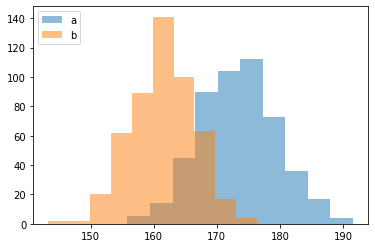

In [5]:
show_histogram(X[Y==0], X[Y==1])

In [6]:
def pdf(x, mean, std):
    return (1 / std * np.sqrt(PI * 2)) * np.exp(-(1 / 2) * ((x - mean) / std) * ((x - mean) / std))

In [7]:
def show_pdf(x, Y_A, Y_B):
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')

    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

In [8]:
x = np.linspace(140, 200, 1000)
Y_A = pdf(x, np.mean(X[Y==0]), np.std(X[Y==0]))
Y_B = pdf(x, np.mean(X[Y==1]), np.std(X[Y==1]))

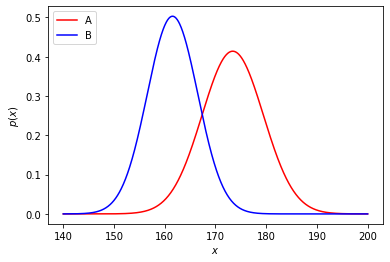

In [9]:
show_pdf(x, Y_A, Y_B)

# Practice 2

추가적으로 테스트 데이터를 샘플링해서, likelihood값만을 이용하는 경우, prior값과 결합하여 posterior로 볼 경우 각각에 대하여 분류 정확도를 보고하고 

(a) likelihood 함수를 그리고, 

(b) prior 적용 시, likelihood x prior 함수를 그리고,

(c) posterior =  likelihood x prior / p(x) 를 그리시오. 

prior의 변화에 따라 decision point를 그래프에서 대략적으로 읽고, prior에 따라서 분류 결과가 어떻게 변화하는지 설명하시오.

In [10]:
practice2_train = np.load('./practice2_train.npz')
print(f'Check key values: {practice2_train.files}')
X_train, Y_train = practice2_train['x'], practice2_train['y']
print(X_train.shape)



Check key values: ['x', 'y']
(1000,)


In [11]:
practice2_test = np.load('./practice2_test.npz')
print(f'Check key values: {practice2_test.files}')
X_test, Y_test = practice2_test['x'], practice2_test['y']
print(X_test.shape)

Check key values: ['x', 'y']
(100,)


In [12]:
def get_likelihood(x, A_mean, A_std, B_mean, B_std):
    return pdf(x, A_mean, A_std), pdf(x, B_mean, B_std)

In [13]:
def get_prior(A, B):
    prior_A = len(A)/ (len(A) + len(B))
    return (prior_A), (1 - prior_A)

In [14]:
def get_posterior(x, A_likelihood, B_likelihood, A_prior, B_prior):
    evidence = (A_likelihood * A_prior) + (B_likelihood * B_prior)
                 
    return A_likelihood * A_prior / evidence, B_likelihood * B_prior / evidence #그래프로 그릴 때 evidence로 나눈다

In [15]:
def get_accuracy(Y_test, A_prob, B_prob):
    y_pred = np.where(A_prob > B_prob, 0, 1)
    return len(np.where(y_pred == Y_test)[0]) / len(y_pred)

Acc: 0.86


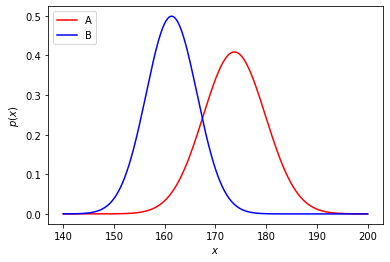

In [16]:
A_likelihood, B_likelihood = get_likelihood(X_test, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))

y_pred = np.where(A_likelihood > B_likelihood, 0, 1)

print(f'Acc: {get_accuracy(Y_test, A_likelihood, B_likelihood)}')

graph_x = np.linspace(140, 200, 1000)
A_graph_x, B_graph_x = get_likelihood(graph_x, 
                                np.mean(X_train[Y_train==0]),
                                np.std(X_train[Y_train==0]),
                                np.mean(X_train[Y_train==1]),
                                np.std(X_train[Y_train==1]))
show_pdf(graph_x, A_graph_x, B_graph_x)

Acc: 0.83


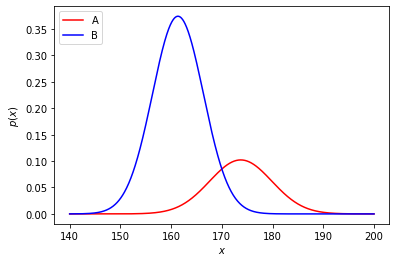

In [17]:
A_prior, B_prior = get_prior(X_train[Y_train==0], X_train[Y_train==1])


print(f'Acc: {get_accuracy(Y_test, A_likelihood * A_prior, B_likelihood * B_prior)}')

show_pdf(graph_x, A_graph_x * A_prior, B_graph_x * B_prior)

Acc: 0.83


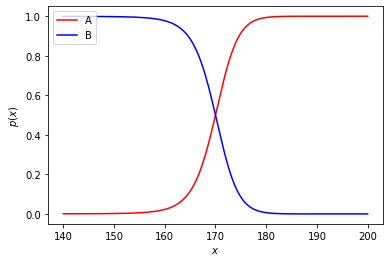

In [18]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

A_graph_prob, B_graph_prob = get_posterior(X_test, A_graph_x, B_graph_x, A_prior, B_prior)


show_pdf(graph_x, A_graph_prob, B_graph_prob)

- prior_A: 0.5
- prior_B: 0.5

In [19]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.5, 0.5)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')



Acc: 0.86


- prior_A: 0.4
- prior_B: 0.6

In [20]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.4, 0.6)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.86


- prior_A: 0.25
- prior_B: 0.75

In [21]:
A_prob, B_prob = get_posterior(X_test, A_likelihood, B_likelihood, 0.25, 0.75)

print(f'Acc: {get_accuracy(Y_test, A_prob, B_prob)}')

Acc: 0.83


# Question 1

위에서 prior probability를 0.5:0.5에서 0.25:0.75로 변화시키면서 Bayesian 분류기의 분류 정확도를 평가하였다.
세가지 경우에서 점점 정확도가 떨어지는 이유에 대하여 설명하시오. 

답 : train data와 test data 사이의 ratio가 일치하지 않았기 때문이다.
train data에서는 A와 B의 ratio가 1:3이었기 때문에 A_prior, B_prior가 각각 0.25, 0.75가 되었다.
아래의 코드를 통해 test data의 A와 B의 크기가 각각 50이기 때문에 A와 B의 ratio가 0.5:0.5 이라는 것을 확인할 수 있고, 
따라서 0.5:0.5 에서 0.25:0.75로 prior probability를 변화시킬 수록 분류 정확도가 떨어지게 된다.






In [23]:
print(A_prior,B_prior)#train set
print(len(X_test[Y_test==0]))#A
print(len(X_test[Y_test==1]))#B

0.25 0.75
50
50


# Practice 3
두 클래스의 평균 사이의 거리를 점차 증가시키면서 train, test 데이터를 샘플링하여 Bayesian 분류기의 정확도를 계산해보시오.

s = 3
mu = (-1, 1), (-2, 2), (-3, 3)
train / test sampling - report performance

In [24]:
def get_data(num_data, ratio, A_mean, A_std, B_mean, B_std):

    num_data_A = int(num_data * ratio)
    num_data_B = num_data - num_data_A

    A = np.random.normal(loc=A_mean, scale=A_std, size=num_data_A)
    B = np.random.normal(loc=B_mean, scale=B_std, size=num_data_B)
    label_zeros = np.zeros((num_data_A, 1))
    label_ones = np.ones((num_data_B, 1))
    
    return A, B, label_zeros, label_ones

In [25]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -1, 3, 1, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.62


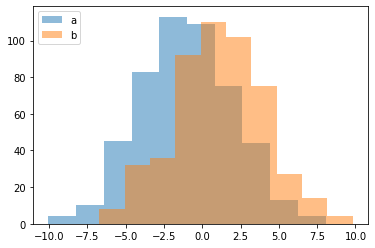

In [26]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)

print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

In [27]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -2, 3, 2, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.72


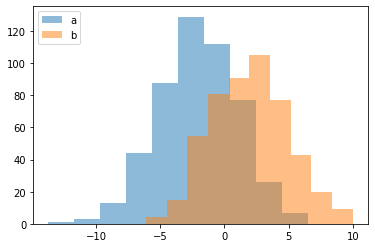

In [28]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

In [29]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)
# Test data
test_A, test_B, test_YA, test_YB = get_data(100, 0.5, -3, 3, 3, 3)
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)

Acc: 0.87


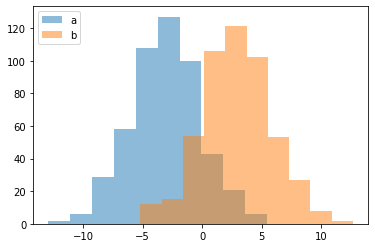

In [30]:
A_likelihood, B_likelihood = get_likelihood(test_X, 
                                np.mean(train_A),
                                np.std(train_A),
                                np.mean(train_B),
                                np.std(train_B))
A_prior, B_prior = get_prior(train_A, train_B)
A_prob, B_prob = get_posterior(test_X, A_likelihood, B_likelihood, A_prior, B_prior)
print(f'Acc: {get_accuracy(test_Y, A_prob, B_prob)}')
show_histogram(train_A, train_B)

두 평균 사이의 거리가 멀어질 수록 accuracy가 증가한다.

# Practice 4

Practice 3에서 그린 세 개의 히스토그램을 probability density function으로 그리시오.



In [31]:
#practice 3에서 그린 히스토그램은 train data 이다.

# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -1, 3, 1, 3)

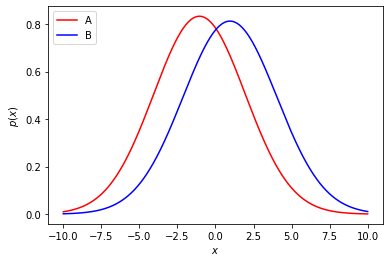

In [32]:
x = np.linspace(-10, 10, 1000) # 히스토그램에 나온 범위를 따름
Y_A = pdf(x, np.mean(train_A), np.std(train_A))#train_A의 mean과 std를 바탕으로 pdf 생성
Y_B = pdf(x, np.mean(train_B), np.std(train_B))#train_B의 mean과 std를 바탕으로 pdf 생성
show_pdf(x, Y_A, Y_B)#pdf 그리기

In [33]:
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -2, 3, 2, 3)


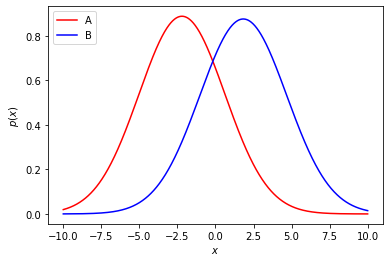

In [34]:
x = np.linspace(-10, 10, 1000) # 히스토그램에 나온 범위를 따름
Y_A = pdf(x, np.mean(train_A), np.std(train_A))#train_A의 mean과 std를 바탕으로 pdf 생성
Y_B = pdf(x, np.mean(train_B), np.std(train_B))#train_B의 mean과 std를 바탕으로 pdf 생성
show_pdf(x, Y_A, Y_B)#pdf 그리기

In [35]:
#두 평균 사이의 거리가 제일 멀어진 데이터
# Train data
train_A, train_B, _, _ = get_data(1000, 0.5, -3, 3, 3, 3)


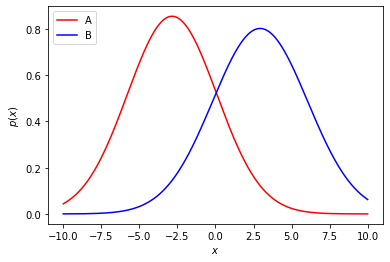

In [36]:
x = np.linspace(-10, 10, 1000) # 히스토그램에 나온 범위를 따름
Y_A = pdf(x, np.mean(train_A), np.std(train_A))#train_A의 mean과 std를 바탕으로 pdf 생성
Y_B = pdf(x, np.mean(train_B), np.std(train_B))#train_B의 mean과 std를 바탕으로 pdf 생성
show_pdf(x, Y_A, Y_B)#pdf 그리기

# Practice 5

두 클래스의 데이터가 다음과 같은 Gaussian 분포를 따른다고 할 때, 아래 설명에 따라 Bayesian 분류기의 분류 정확도를 계산하시오. 

A class : mu = -1, s = 3
B class : mu = 3, s = 2

a) P(A)=P(B)일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

b) P(A)=1/3, P(B)=2/3일 때, p(x|A), p(x|B), P(A|x), P(B|x)를 그리시오.

c) a)와 b)에서 구한 p(A|x)=p(B|x)을 풀면 decision point를 구할 수 있다. 각 decision point를 구하여 a)와 b)에서 그린 그래프 위에 표시하시오. 

d) Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

e) test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)



# a)

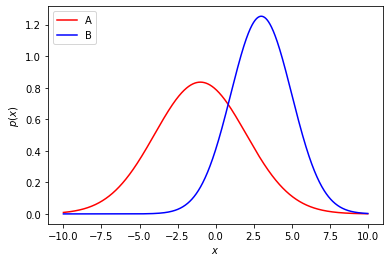

In [37]:
#p(x|A), p(x|B):likelihood
#train data
x = np.linspace(-10, 10, 1000) 

A_likelihood_a, B_likelihood_a = get_likelihood(x, -1, 3, 3, 2)
show_pdf(x, A_likelihood_a, B_likelihood_a)#pdf 그리기




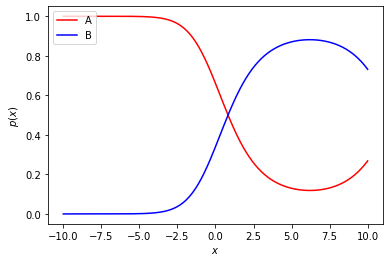

In [38]:
#P(A|x), P(B|x)
# 위에서 구한 likelihood 이용

A_prob_a, B_prob_a=get_posterior(x, A_likelihood_a, B_likelihood_a, 0.5, 0.5)#P(A)=P(B)이므로 P(A)=P(B)= 0.5

show_pdf(x, A_prob_a, B_prob_a)#pdf 그리기

# b)

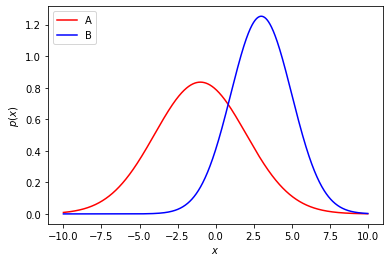

In [39]:
#a와 동일

#p(x|A), p(x|B):likelihood
A_likelihood_b, B_likelihood_b = get_likelihood(x, -1, 3, 3, 2)
show_pdf(x, A_likelihood_b, B_likelihood_b)#pdf 그리기




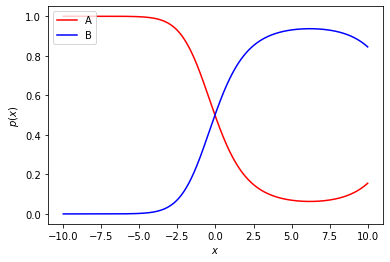

In [40]:
#P(A|x), P(B|x)
# 위에서 구한 likelihood 이용

A_prob_b, B_prob_b=get_posterior(x, A_likelihood_b, B_likelihood_b, 1/3, 2/3)#P(A)=P(B)이므로 P(A)=P(B)= 0.5
show_pdf(x, A_prob_b,B_prob_b)#pdf 그리기

# c)

In [41]:
def get_DP(A_prob,B_prob): #DP의 idx를 구하는 함수
    for i in range(len(A_prob)-1):
        if (A_prob[i]-B_prob[i])*(A_prob[i+1]-B_prob[i+1])<=0: #A_prob와 B_prob가 만나거나,위아래가 역전되는 idx
            return i
    return -1#search fail

In [42]:
def show_pdf_dot(x, Y_A, Y_B,DP_x,DP_y):#show_pdf()를 변형하여 점을 함께 표시하는 함수
    plt.plot(x, Y_A, color='red', label='A')
    plt.plot(x, Y_B, color='blue', label='B')
    plt.scatter(DP_x,DP_y, label='DP')#DP 점 표시 
    
  
    plt.legend(loc='upper left')
    plt.xlabel("$x$")
    plt.ylabel("$p(x)$")
    plt.show()

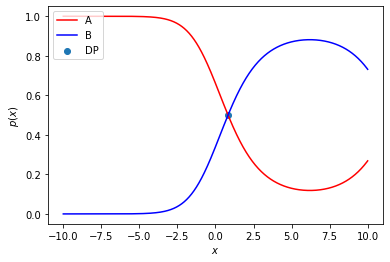

In [43]:
#p(A|x)=p(B|x)


#a)

idx=get_DP(A_prob_a,B_prob_a)
DP_x,DP_y=x[idx],A_prob_a[idx]#DP의 x,y좌표, B_prob로 해도 동일하거나 거의 유사한 결과이다.
show_pdf_dot(x, A_prob_a, B_prob_a,DP_x,DP_y)

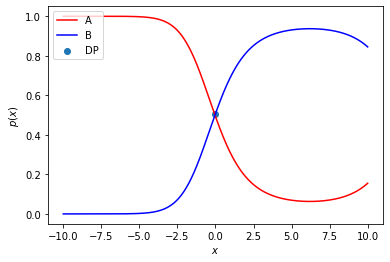

In [44]:
#b)
idx=get_DP(A_prob_b,B_prob_b)
DP_x,DP_y=x[idx],A_prob_b[idx]#DP의 x,y좌표, B_prob로 해도 동일하거나 거의 유사한 결과이다.
show_pdf_dot(x, A_prob_b, B_prob_b,DP_x,DP_y)

# d) 
Decision point를 구한 후에 Bayesian 분류기의 분류 방법이 어떻게 간단히 변화할 수 있는지 설명하시오.

답: Decision point의 x좌표보다 x좌표가 작거나 같은 데이터는 A(해당 구간에서 posterior이 더 높거나 같은 class), 큰 데이터는 B(해당 구간에서 posterior이 더 높은 class)로 분류한다. 이때, 해당하는 구간의 확률값을 1로, 해당하지 않는 구간의 확률값을 0으로 하면 기존의 get_accuracy()에서 정확도를 구할 수 있다.

# e)

In [45]:
#test set을 A, B 클래스에 대하여 각 100개씩 샘플링하여, d)에서 설명한 방법으로 분류 정확도를 구하시오. 단, P(A)=P(B)
# Test set
#A class : mu = -1, s = 3 B class : mu = 3, s = 2

test_A, test_B, test_YA, test_YB = get_data(200, 0.5, -1, 3, 3, 2)#P(A)=P(B),각 100개
test_X = np.concatenate((test_A, test_B))
test_Y = np.concatenate((test_YA, test_YB)).reshape(-1)


In [47]:
#DP값 구하기 (A_prob_a 와 B_prob_a는 유지된 상태 )
idx=get_DP(A_prob_a,B_prob_a)
DP_x,DP_y=x[idx],A_prob_a[idx]#DP의 x,y좌표, B_prob로 해도 동일하거나 거의 유사한 결과이다.
A_prob_e=np.where(test_X<=DP_x,1,0)#작거나 같은 것
B_prob_e=np.where(test_X>DP_x,1,0)#큰것, A의 반대로 나온다.

print(f'Acc: {get_accuracy(test_Y, A_prob_e, B_prob_e)}')

Acc: 0.805
